# Adaboost
For this exercise you will implement AdaBoost from scratch and applied it to a spam dataset. You will be classifying data into spam and not spam. You can call DecisionTreeClassifier from sklearn to learn your base classifiers.

Here is how you train a decision tree classifier with weights.

`
h = DecisionTreeClassifier(max_depth=1, random_state=0)
h.fit(X, Y, sample_weight=w)
`

#### 1. Write a program implementing AdaBoost with trees using the template and tests given to you

In [209]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [210]:
import pandas as pd

In [211]:
# accuracy computation
def accuracy(y, pred):
    return np.sum(y == pred) / float(len(y)) 

In [212]:
def parse_spambase_data(filename):
    """ Given a filename return X and Y numpy arrays

    X is of size number of rows x num_features
    Y is an array of size the number of rows
    Y is the last element of each row. (Convert 0 to -1)
    """
    # YOUR CODE HERE
    data = pd.read_csv(filename, header = None)
    try:
        X = data.iloc[:,:-1]
        Y = data.iloc[:,-1]
        Y[Y==0] = -1
    except:
        raise NotImplementedError()
    return X, Y

In [213]:
y_test = np.array([1., -1., 1., 1., -1., -1., 1., 1., 1., -1.])
X, Y = parse_spambase_data("tiny.spam.train")
for i in range(len(y_test)): assert(y_test[i] == Y[i])
n, m = X.shape
assert(n == 10)
assert(m == 57)

/Users/libingyi/anaconda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [214]:
def adaboost(X, y, num_iter):
    """Given an numpy matrix X, a array y and num_iter return trees and weights 
   
    Input: X, y, num_iter
    Outputs: array of trees from DecisionTreeClassifier
             trees_weights array of floats
    Assumes y is {-1, 1}
    """
    trees = []
    trees_weights = [] 
    N, _ = X.shape
    d = np.ones(N) / N

    # YOUR CODE HERE    
    try:
        for i in range(num_iter):
            h = DecisionTreeClassifier(max_depth=1, random_state=0)
            h.fit(X, y, sample_weight=d)
            error = np.sum(d * (h.predict(X) != y))/np.sum(d)
            alpha = np.log((1-error)/error)
            d = np.array(d * np.exp(alpha * (h.predict(X) != y)))
            trees.append(h)
            trees_weights.append(alpha)
    except:
        raise NotImplementedError()
    return trees, trees_weights

In [215]:
X, Y = parse_spambase_data("tiny.spam.train")
trees, weights = adaboost(X, Y, 2)
assert(len(trees) == 2)
assert(len(weights) == 2)
assert(isinstance(trees[0], DecisionTreeClassifier))

/Users/libingyi/anaconda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [216]:
x = np.array([[0, -1], [1, 0], [-1, 0]])
y = np.array([-1, 1, 1])
trees, weights = adaboost(x, y, 1)
h = trees[0]
pred = h.predict(x)
for i in range(len(y)): assert(pred[i] == y[i])

/Users/libingyi/anaconda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/Users/libingyi/anaconda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply


In [217]:
def adaboost_predict(X, trees, trees_weights):
    """Given X, trees and weights predict Y
    """
    # YOUR CODE HERE
    Y = np.sum([trees_weights[i] * trees[i].predict(X) for i in range(len(trees))], axis = 0)
    return np.sign(Y)

In [218]:
x = np.array([[0, -1], [1, 0], [-1, 0]])
y = np.array([-1, 1, 1])
trees, weights = adaboost(x, y, 1)
pred = adaboost_predict(x, trees, weights)
for i in range(len(y)):
    assert(pred[i] == y[i])

/Users/libingyi/anaconda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/Users/libingyi/anaconda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply


In [219]:
X, Y = parse_spambase_data("spambase.train")
X_test, Y_test = parse_spambase_data("spambase.test")
trees, trees_weights = adaboost(X, Y, 10)
Yhat = adaboost_predict(X, trees, trees_weights)
Yhat_test = adaboost_predict(X_test, trees, trees_weights)
    
acc_test = accuracy(Y_test, Yhat_test)
acc_train = accuracy(Y, Yhat)
print("Train Accuracy %.4f" % acc_train)
print("Test Accuracy %.4f" % acc_test)
assert(np.around(acc_train, decimals=4)==0.9111)
assert(np.around(acc_test, decimals=4)==0.9190)

Train Accuracy 0.9111
Test Accuracy 0.9190


/Users/libingyi/anaconda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


#### 2. Apply AdaBoost to spambase dataset using different values for the number of trees numTrees. How do you find the best value for numTrees? Report train and validation accuracy for the best value of numTrees. Make a plot that shows your experiment (training and validation error as a function of the number of trees). Try as least 2000 trees.

In [189]:
trees, trees_weights = adaboost(X, Y, 4000)

In [190]:
numTreesList = range(0, 4000, 50)
acc = pd.DataFrame({"numTrees":np.zeros(len(numTreesList)), "trainAcc":np.zeros(len(numTreesList)), "valAcc":np.zeros(len(numTreesList))})
Yhat = np.zeros(X.shape[0])
Yhat_test = np.zeros(X_test.shape[0])

i = 0
for j in range(4000):   
    Yhat += trees_weights[j] * trees[j].predict(X)
    Yhat_test += trees_weights[j] * trees[j].predict(X_test)
    
    if j%50 == 0:
        trainAcc = accuracy(Y, np.sign(Yhat))
        valAcc = accuracy(Y_test, np.sign(Yhat_test))
        acc.iloc[i] = j, trainAcc, valAcc
        i += 1

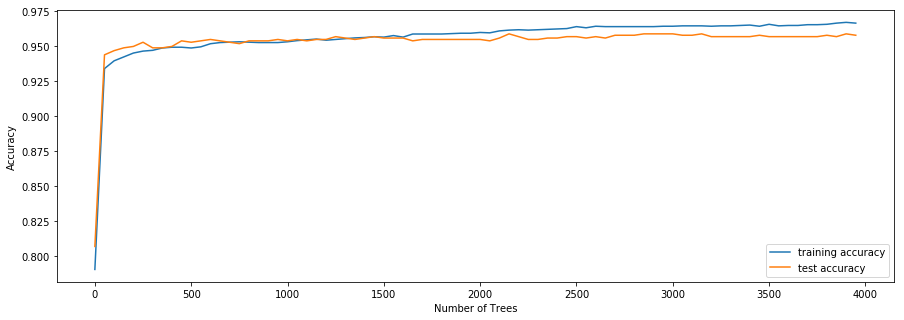

In [191]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(acc['numTrees'], acc['trainAcc'])
plt.plot(acc['numTrees'], acc['valAcc'])
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend(['training accuracy', 'test accuracy'], loc='lower right')
plt.show()

In [192]:
acc.sort_values(by = ['valAcc'], ascending = False).head(10)

,numTrees,trainAcc,valAcc
58,2900.0,0.964167,0.959
63,3150.0,0.964722,0.959
78,3900.0,0.967222,0.959
43,2150.0,0.961667,0.959
57,2850.0,0.964167,0.959
59,2950.0,0.964444,0.959
60,3000.0,0.964444,0.959
54,2700.0,0.964167,0.958
55,2750.0,0.964167,0.958
56,2800.0,0.964167,0.958


In [193]:
trainAcc = acc[acc['numTrees'] == 2900]['trainAcc']
valAcc = acc[acc['numTrees'] == 2900]['valAcc']
print('Best Number of Trees :', '2900')
print('Best Training Accuracy : %.4f' %trainAcc)
print('Best Validation Accuracy: %.4f' %valAcc)

Best Number of Trees : 2900
Best Training Accuracy : 0.9642
Best Validation Accuracy: 0.9590


#### 3. Compare your results with the results of running the gradient boosting package (XGBoost). Make a plot that shows the result of your experiments. Explore the hyper parameters given in the package.

In [195]:
from xgboost.sklearn import XGBClassifier

In [196]:
Y = Y.clip(1,0)
Y_test = Y_test.clip(1,0)

In [197]:
xgb0 = XGBClassifier()

In [198]:
xgb0.fit(X,Y, eval_set=[(X, Y), (X_test, Y_test)], eval_metric='error', verbose='False')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [199]:
Y_pred = xgb0.predict(X_test)

In [200]:
accuracy(Y_test, Y_pred)

0.95499999999999996

In [201]:
acc_xgb = pd.DataFrame({"numTrees":np.zeros(len(range(0, 4000, 50))), "trainAcc":np.zeros(len(range(0, 4000, 50))), "valAcc":np.zeros(len(range(0, 4000, 50)))})

i = 0
for j in range(0, 4000, 50):
    xgb = XGBClassifier(n_estimators=i)
    xgb.fit(X,Y)
    trainAcc = accuracy(Y, xgb.predict(X))
    valAcc = accuracy(Y_test, xgb.predict(X_test))
    acc_xgb.iloc[i] = j, trainAcc, valAcc
    i += 1

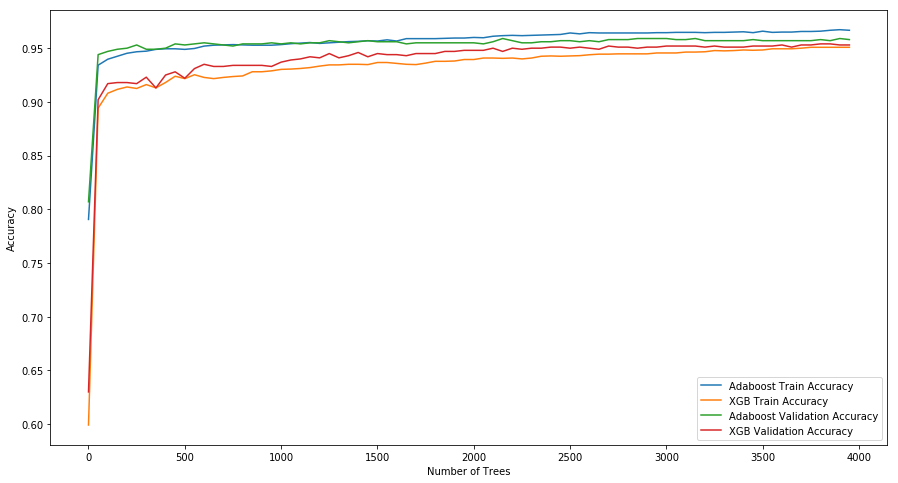

In [202]:
plt.figure(figsize=(15,8))
plt.plot(acc['numTrees'], acc['trainAcc'])
plt.plot(acc_xgb['numTrees'], acc_xgb['trainAcc'])
plt.plot(acc['numTrees'], acc['valAcc'])
plt.plot(acc_xgb['numTrees'], acc_xgb['valAcc'])
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend(['Adaboost Train Accuracy', 'XGB Train Accuracy', 'Adaboost Validation Accuracy', 'XGB Validation Accuracy'], loc='lower right')
plt.show()

In [203]:
acc_xgb.sort_values(by = ['valAcc'], ascending = False).head(10)

,numTrees,trainAcc,valAcc
77,3850.0,0.950833,0.954
76,3800.0,0.950833,0.954
79,3950.0,0.950833,0.953
78,3900.0,0.950833,0.953
75,3750.0,0.950833,0.953
74,3700.0,0.950000,0.953
72,3600.0,0.949444,0.953
65,3250.0,0.947778,0.952
54,2700.0,0.944444,0.952
60,3000.0,0.945556,0.952


In [204]:
xgb_tuned = XGBClassifier(n_estimators = 2000, max_depth = 5, learning_rate = 0.1, n_jobs = -1, eval_metric = 'error',
                   objective = 'binary:logistic', min_child_weight = 1, subsample = 1)

In [205]:
xgb_tuned.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='error', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=2000, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [206]:
y_pred = xgb.predict(X_test)
accuracy(Y_test, y_pred)

0.95299999999999996